# 선형 회귀 모델로 보험료 예측하기

### 1. Import library & data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # MSE library

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data = pd.read_csv(file_url)

### 2. Check data

In [4]:
data.head()

# 독립변수: X
# age: 나이
# sex: 성별
# bmi: bmi 지수
# children: 자녀수
# smoker: 흡연 여부

# 종속변수: y
# charges: 보험 청구료

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [5]:
data.shape

(1338, 6)

In [6]:
round(data.describe(), 2)
# rount(): 반올림

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


### 3. Data preprocessing
- split train dataset and test dataset

In [8]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker']] # 독립변수
y = data['charges'] # 종속변수

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

* random_state: 랜덤 샘플링 ~ 데이터를 특정 비율로 나눌 때 마구잡이로 뒤섞어서 나누는 것 but 같은 숫자라면 일관성을 유지함

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


### 4. Modeling

In [11]:
model = LinearRegression()

### 5. Training

In [12]:
model.fit(X_train, y_train)

LinearRegression()

### 6. Predict

In [13]:
pred = model.predict(X_test)

### 7. Evaluation
- 1. using a table

In [14]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [15]:
comparison

,actual,pred
764,9095.06825,8554.817116
887,5272.17580,6973.587467
890,29330.98315,36798.604161
1293,9301.89355,9417.882823
259,33750.29180,26871.680311
...,...,...
109,47055.53210,39220.995889
575,12222.89830,11695.634124
535,6067.12675,7253.598675
543,63770.42801,40950.539904


- 2. using a scatter plot

<AxesSubplot:xlabel='actual', ylabel='pred'>

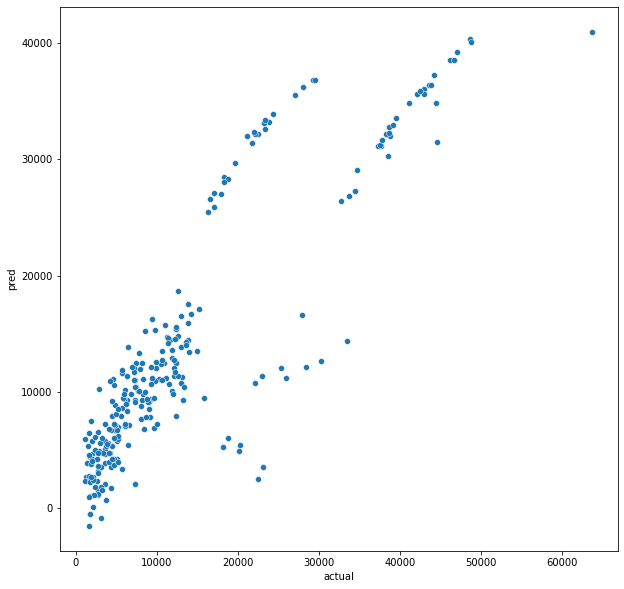

In [16]:
plt.figure(figsize=(10, 10)) # set up figure size
sns.scatterplot(x = 'actual', y = 'pred', data = comparison) # 산점도 그래프 생성

- 3. using RMSE(Root Mean Squared Error)
> 오차(예측값-실제값)의 값만 시그마를 취하게 되면 합이 0이 나올 수도 있으므로 오차의 제곱의 합을 쓰는 것이 MSE(Mean Squared Error)이다.<br>
> 하지만 이렇게만 하면 값이 너무 크게 나오기 때문에 루트(Root)를 씌운 값을 사용하는 것이 일반적이다.

- 이외에도 MAE(Mean Absolute Error)라고 하는 '평균 절대 오차'도 있다.

In [17]:
mean_squared_error(y_test, pred) ** 0.5

5829.17293025419

In [18]:
mean_squared_error(y_test, pred, squared = False) # same to the formula above.

5829.17293025419

In [19]:
model.score(X_train, y_train)

0.7410888590280913

In [20]:
model.coef_

array([ 2.57068962e+02, -7.95178837e+00,  3.27533514e+02,  4.27254431e+02,
        2.36539033e+04])

In [21]:
# 예측 모델의 기울기(계수)
coef = pd.Series(model.coef_, index = X.columns)
pd.DataFrame(coef, columns = ['coefficient'])
# pd.Series(): 데이터를 Series 형태로 변환
# pd.DataFrame(): 데이터를 DataFrame 형태로 변환
# 선형 회귀 모델의 계수(coef)를 가지고 영향도를 평가할 때는 절댓값을 기준으로 평가한다. 즉, 절댓값이 크면 영향도가 크다는 것이다.

,coefficient
age,257.068962
sex,-7.951788
bmi,327.533514
children,427.254431
smoker,23653.903315


In [22]:
# 예측 모델의 y 절편
model.intercept_

-12113.451250917087